# Dimensionaliy Reduction using t-SNE, Isomap, LLE techniques.

In this notebook we will go through the dimensionality reduction using different techniques and comparision of dataset before and after the reduction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import MDS

In [2]:
# Load the Breast Cancer Wisconsin dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
column_names = ['ID', 'Diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness', 'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry', 'se_fractal_dimension', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']
data = pd.read_csv(url, header=None, names=column_names)

In [3]:
# Extract features and target
X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis']

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##SVD Dimensionality Reduction**:
   - Apply TruncatedSVD to reduce the data to 2 dimensions.
   - Visualize the original data and reduced data using scatter plots.

In [5]:
# Apply SVD for dimensionality reduction
svd = TruncatedSVD(n_components=2)
reduced_data_svd = svd.fit_transform(X_scaled)

#MDS Dimensionality Reduction**:
   - Use Multi-Dimensional Scaling to reduce data to 2 dimensions.
   - Visualize the original data and reduced data using scatter plots.

In [6]:
# Apply MDS for dimensionality reduction
mds = MDS(n_components=2)
reduced_data_mds = mds.fit_transform(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


#Visulizations for SVD Dimensionality reduction technique.
This plots shows the difference in the data before and after dimensionality reduction using SVD technique.

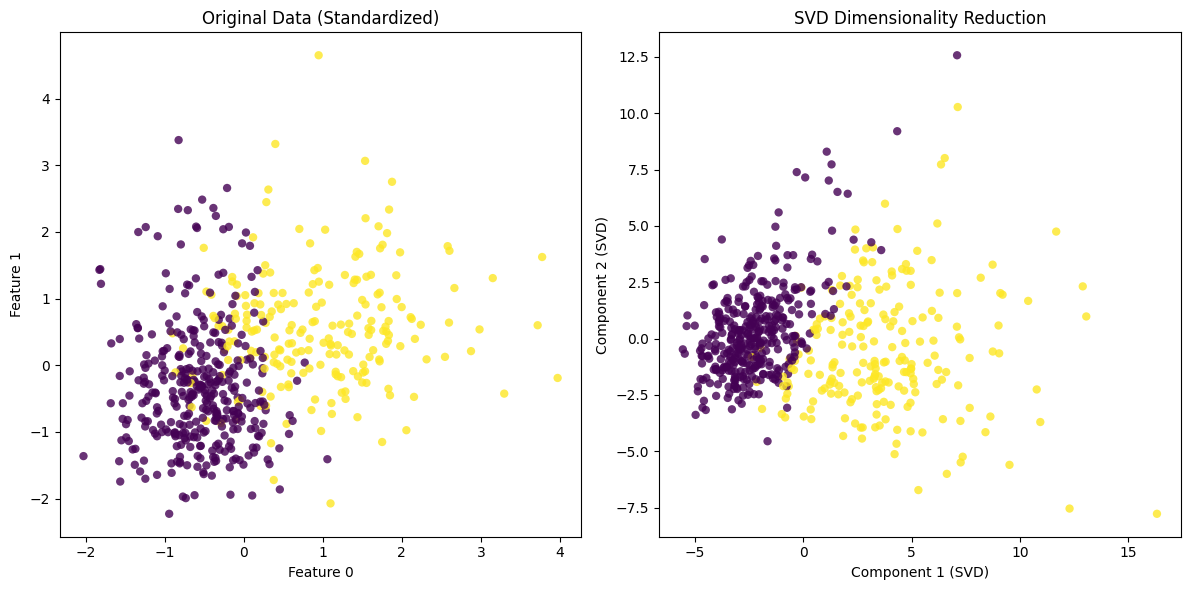

In [12]:
y_numeric = (y == 'M').astype(int)  # Convert Malignant (M) to 1, Benign (B) to 0

# Visualize the differences before and after reduction for SVD
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='viridis', edgecolor='none', alpha=0.8)
plt.title('Original Data (Standardized)')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

plt.subplot(1, 3, 2)
plt.scatter(reduced_data_svd[:, 0], reduced_data_svd[:, 1], c=y_numeric, cmap='viridis', edgecolor='none', alpha=0.8)
plt.title('SVD Dimensionality Reduction')
plt.xlabel('Component 1 (SVD)')
plt.ylabel('Component 2 (SVD)')


plt.tight_layout()
plt.show()

#Visulizations for MDS Dimensionality reduction technique.
This plots shows the difference in the data before and after dimensionality reduction using MDS technique.

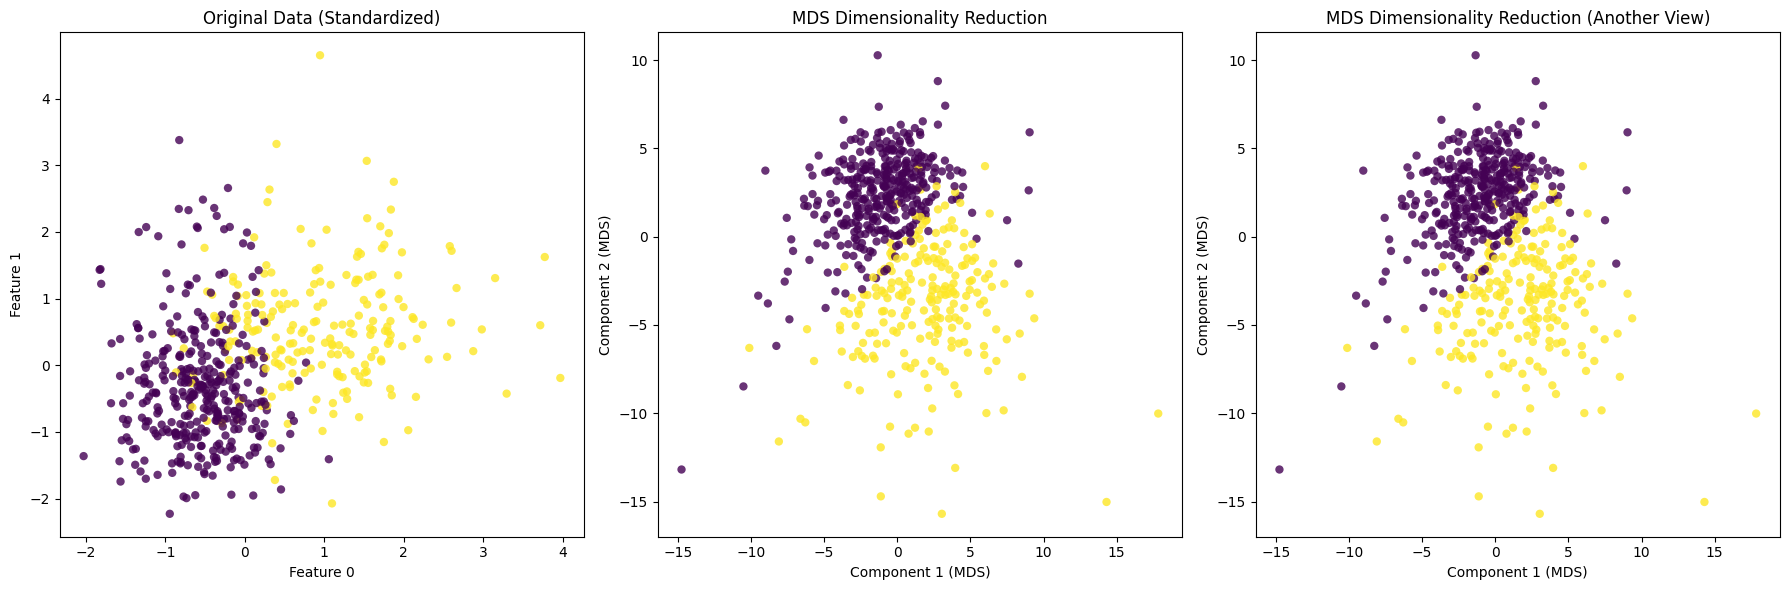

In [13]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='viridis', edgecolor='none', alpha=0.8)
plt.title('Original Data (Standardized)')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

plt.subplot(1, 3, 2)
plt.scatter(reduced_data_mds[:, 0], reduced_data_mds[:, 1], c=y_numeric, cmap='viridis', edgecolor='none', alpha=0.8)
plt.title('MDS Dimensionality Reduction')
plt.xlabel('Component 1 (MDS)')
plt.ylabel('Component 2 (MDS)')

plt.subplot(1, 3, 3)
plt.scatter(reduced_data_mds[:, 0], reduced_data_mds[:, 1], c=y_numeric, cmap='viridis', edgecolor='none', alpha=0.8)
plt.title('MDS Dimensionality Reduction (Another View)')
plt.xlabel('Component 1 (MDS)')
plt.ylabel('Component 2 (MDS)')

plt.tight_layout()
plt.show()


#Dimensionality Reduction using ISOMap, LLE,  t-sne techniques.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding

In [16]:
X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Applying Isomap technique

###Isomap is a manifold learning technique that creates a low-dimensional embedding while preserving the geodesic distances between all pairs of points. It retains the global structure of the data, particularly suited for data distributed on a manifold or nonlinear shapes.

In [17]:
isomap = Isomap(n_components=2)
reduced_data_isomap = isomap.fit_transform(X_scaled)


#Applying LLE technique
###LLE is a method that seeks a low-dimensional representation of high-dimensional data while preserving the local relationships between neighboring data points. It reconstructs high-dimensional data points using linear combinations of their neighbors, maintaining the data's intrinsic geometry.


In [18]:
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
reduced_data_lle = lle.fit_transform(X_scaled)

#Applying t-SNE technique

###t-SNE is a nonlinear dimensionality reduction technique used for visualizing high-dimensional data. It focuses on preserving local similarities or relationships between data points in the reduced dimensions. It's great for visualizing clusters or groups within the data.

In [19]:
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(X_scaled)

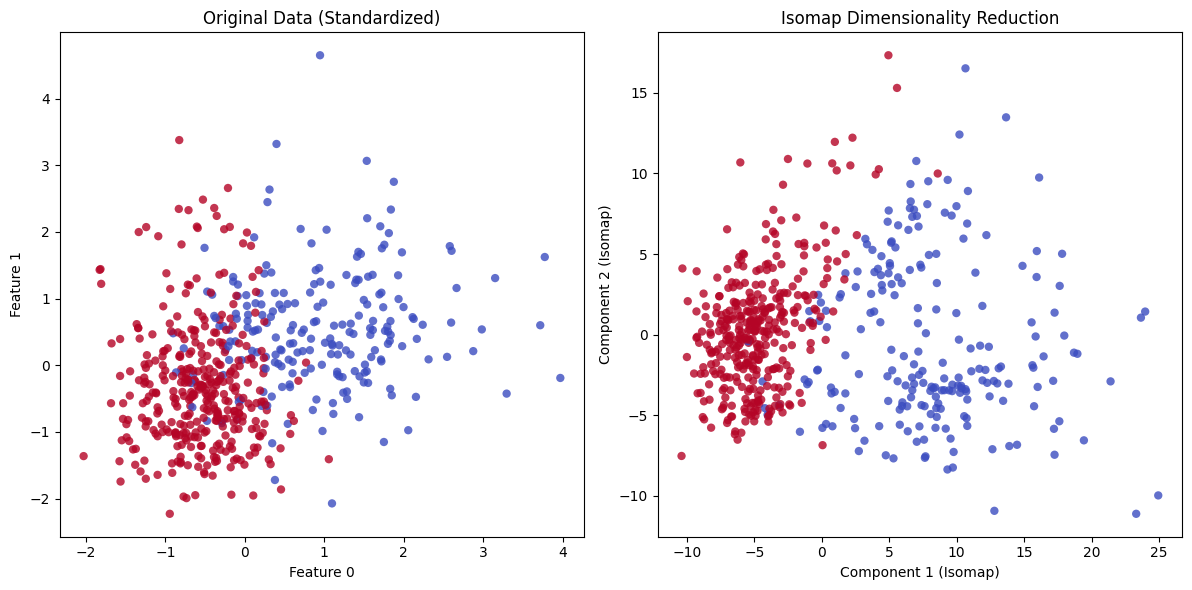

In [24]:
# Convert diagnosis labels to numeric for coloring
color_map = {'M': 0, 'B': 1}
y_numeric = y.map(color_map)

# Visualize the differences before and after reduction for Isomap
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='none', alpha=0.8)
plt.title('Original Data (Standardized)')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

plt.subplot(1, 3, 2)
plt.scatter(reduced_data_isomap[:, 0], reduced_data_isomap[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='none', alpha=0.8)
plt.title('Isomap Dimensionality Reduction')
plt.xlabel('Component 1 (Isomap)')
plt.ylabel('Component 2 (Isomap)')


plt.tight_layout()
plt.show()

# Repeat the process for LLE
# ...


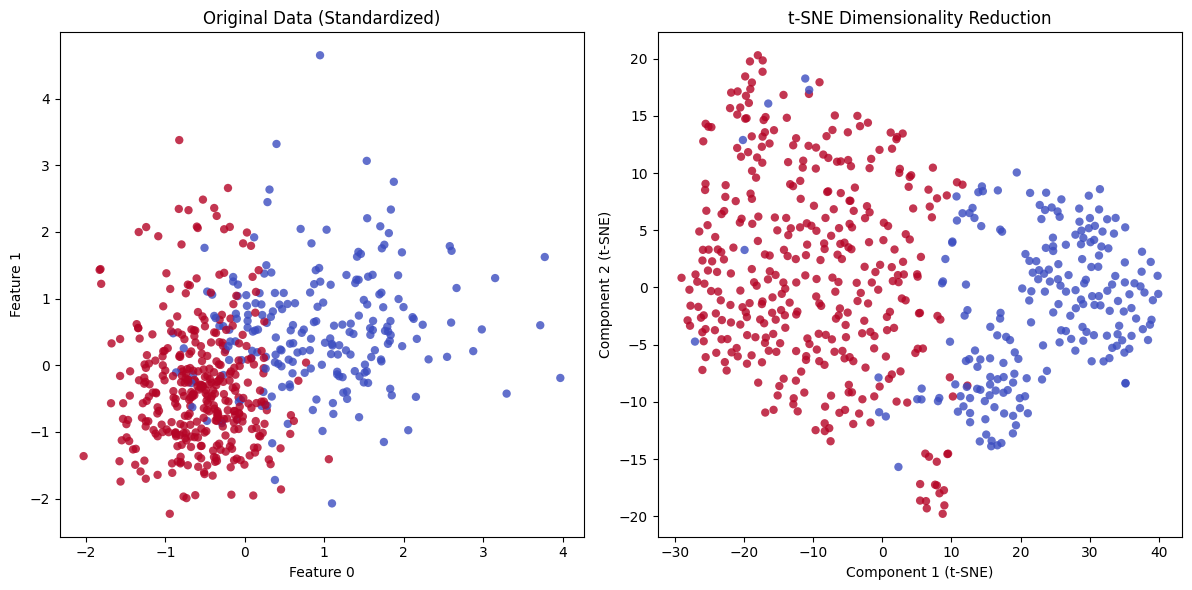

In [26]:
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(X_scaled)

# Visualize the differences before and after reduction for t-SNE
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='none', alpha=0.8)
plt.title('Original Data (Standardized)')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

plt.subplot(1, 3, 2)
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='none', alpha=0.8)
plt.title('t-SNE Dimensionality Reduction')
plt.xlabel('Component 1 (t-SNE)')
plt.ylabel('Component 2 (t-SNE)')



plt.tight_layout()
plt.show()

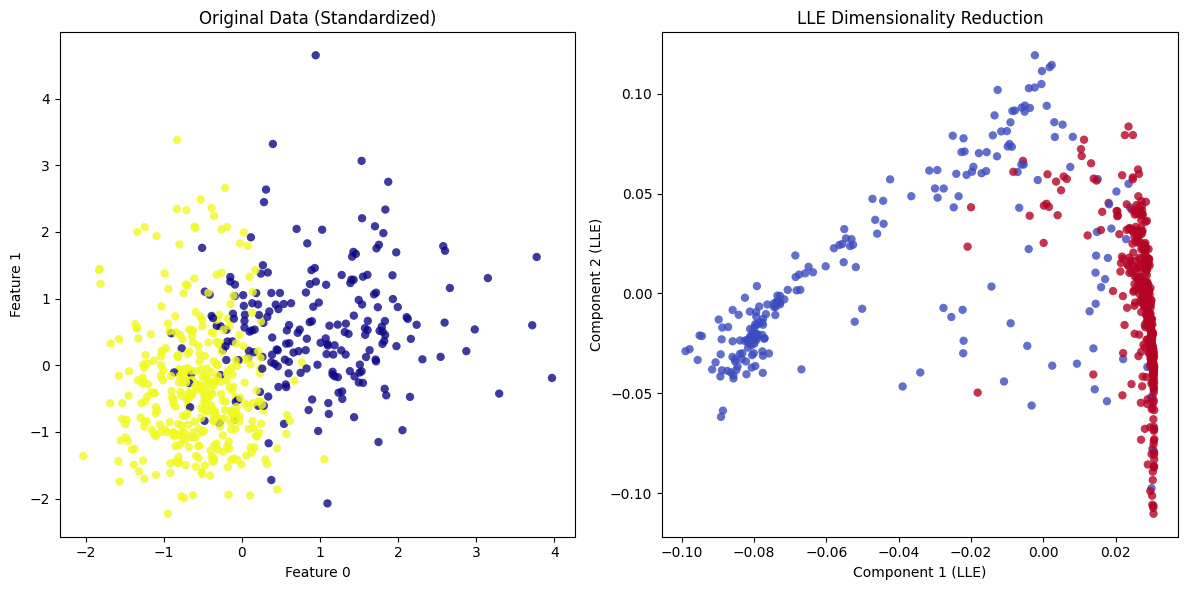

In [29]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='plasma', edgecolor='none', alpha=0.8)
plt.title('Original Data (Standardized)')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

plt.subplot(1, 3, 2)
plt.scatter(reduced_data_lle[:, 0], reduced_data_lle[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='none', alpha=0.8)
plt.title('LLE Dimensionality Reduction')
plt.xlabel('Component 1 (LLE)')
plt.ylabel('Component 2 (LLE)')



plt.tight_layout()
plt.show()